In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # Import Sklearn KMeans clustering 
import seaborn as sns

In [55]:
data = pd.read_csv('./datasets/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [56]:
data.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [57]:
#data.isnull().sum()
data.dtypes

CustomerID         int64
Gender            object
Age                int64
Annual Income      int64
Spending Score     int64
dtype: object

In [58]:
#data.Gender.value_counts()
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Female & Male Ratio')

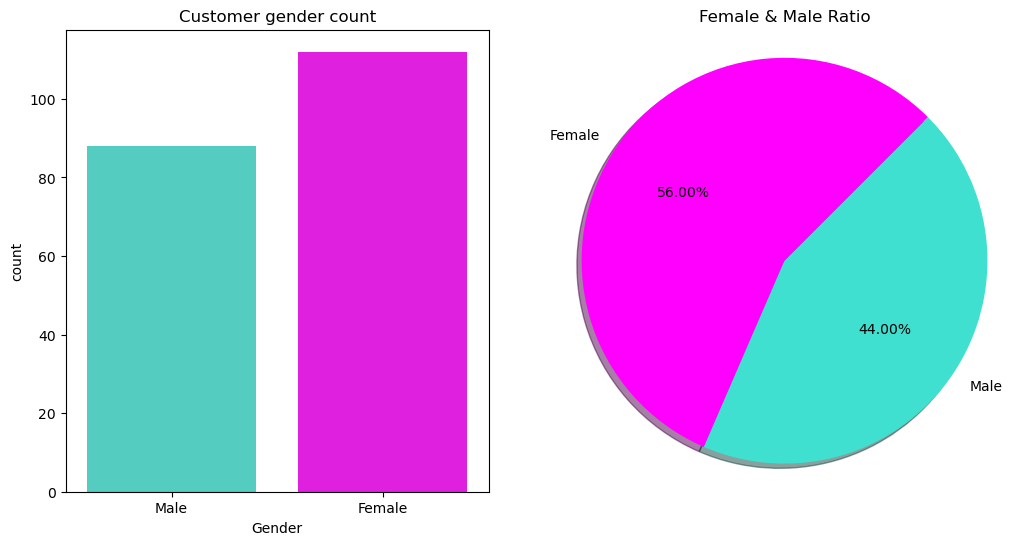

In [61]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))

sns.countplot(x='Gender', data=data, ax = ax1, palette=['turquoise', 'magenta'])
ax1.set_title('Customer gender count')

totalGender = data.Gender.value_counts()

ax2.axis('equal')
ax2.pie(totalGender, labels=['Female', 'Male'], radius=1.2, autopct='%0.2f%%', shadow=True, explode=[0, 0], startangle=45, colors=['magenta', 'turquoise'])
ax2.set_title('Female & Male Ratio')

Text(0.5, 1.0, 'Histogram - Count by Age Range (8 Bins)')

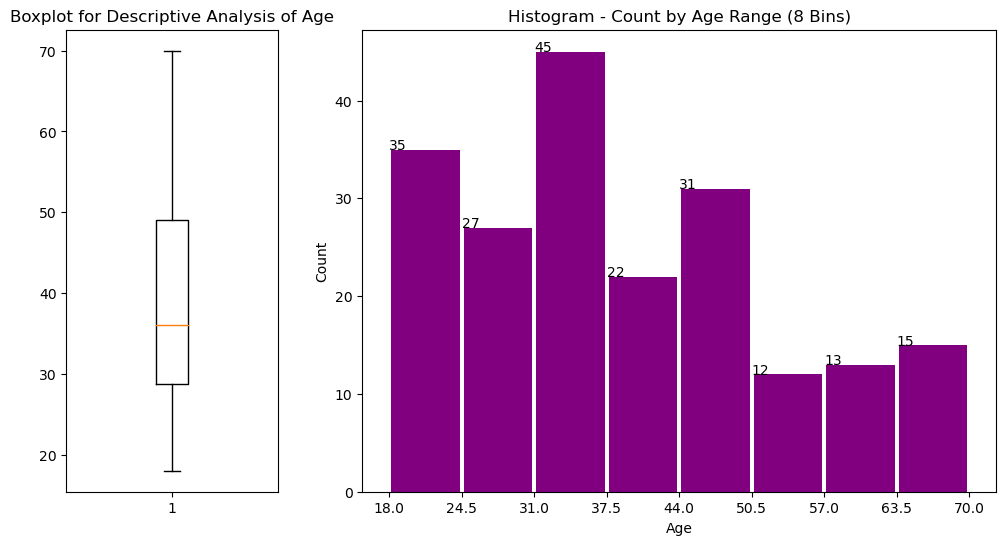

In [65]:
from matplotlib.gridspec import GridSpec
gs = GridSpec(1, 2, width_ratios=[1,3])

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.boxplot(data["Age"])
ax1.set_title('Boxplot for Descriptive Analysis of Age')

bins_8 = 8

x_offset = 0.2
y_offset = 0.2

age_column = data['Age']

bins_aux = np.linspace(age_column.min(), age_column.max(), bins_8 + 1)

hist = plt.hist(data['Age'], bins = bins_aux, rwidth=0.95, color = 'purple')
for i in range(bins_8):
    ax2.text(hist[1][i],hist[0][i],int(hist[0][i]))
ax2.set_xticks(bins_aux)

ax2.set_xlabel('Age')
ax2.set_ylabel('Count')
ax2.set_title('Histogram - Count by Age Range (8 Bins)')

In [ ]:
""" bins_8 = 8

age_column = data['Age']

bins_aux = np.linspace(age_column.min(), age_column.max(), bins_8 + 1)
arr = plt.hist(data['Age'], bins = bins_aux, rwidth=0.95, color = 'purple') 
plt.xticks(bins_aux)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram - Count by Age Range (8 Bins)')
for i in range(bins_8):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i])) """

If we use 8 bins we lose much detail and the distribution is flattened

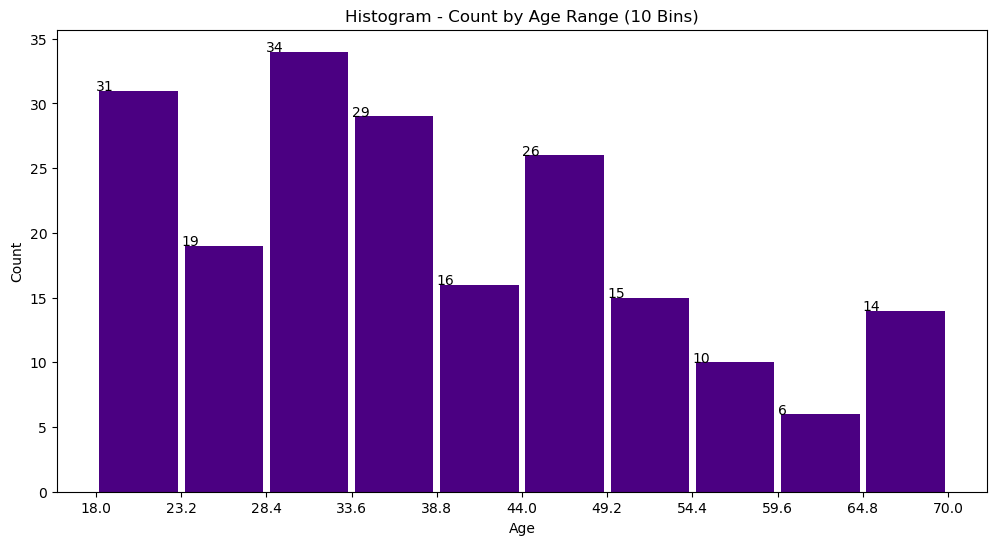

In [66]:
fig = plt.figure(figsize=(12, 6))

bins_10 = 10

age_column = data['Age']

bins_aux = np.linspace(age_column.min(), age_column.max(), bins_10 + 1)
hist = plt.hist(age_column, bins = bins_aux, rwidth=0.92, color = 'indigo') 
plt.xticks(bins_aux)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram - Count by Age Range (10 Bins)')
for i in range(bins_10):
    plt.text(hist[1][i],hist[0][i],int(hist[0][i]))

I thought it would be interesting to see if these sensibly over-represented groups are due to outliers or not

In [ ]:
#g = sns.catplot(y='Age', data = data, kind = "violin", inner = None)
#sns.swarmplot(y = 'Age', data = data, ax = g.ax, dodge = True, color = "purple")

In [23]:
data['Annual Income'].describe()

count     15079.000000
mean     109742.880562
std       52249.425866
min       20022.000000
25%       64141.000000
50%      109190.000000
75%      155008.000000
max      199974.000000
Name: Annual Income, dtype: float64

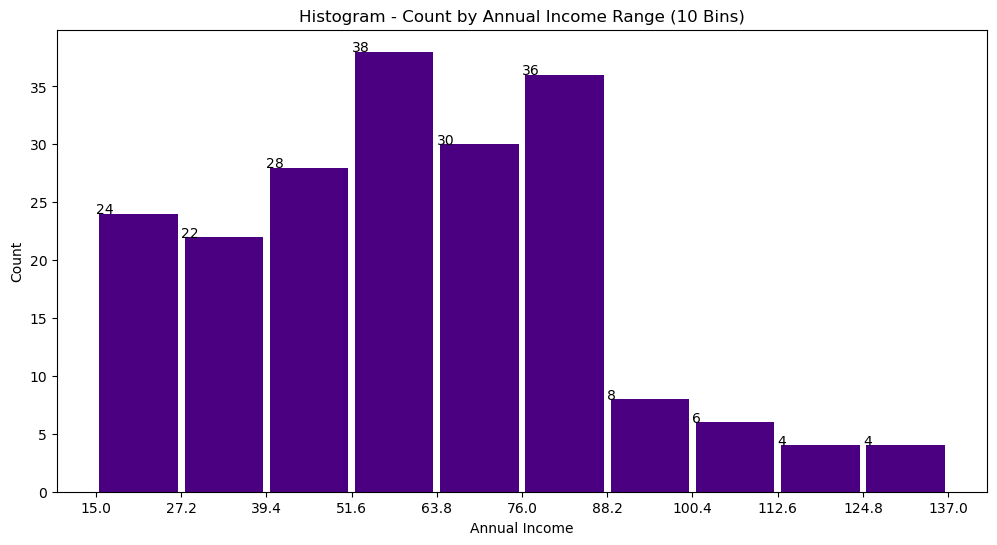

In [63]:
fig = plt.figure(figsize=(12, 6))

bins_10 = 10

income_column = data['Annual Income']

bins_aux = np.linspace(income_column.min(), income_column.max(), bins_10 + 1)
hist = plt.hist(income_column, bins = bins_aux, rwidth=0.92, color = 'indigo') 
plt.xticks(bins_aux)

plt.xlabel('Annual Income (x1000 $)')
plt.ylabel('Count')
plt.title('Histogram - Count by Annual Income Range (10 Bins)')
for i in range(bins_10):
    plt.text(hist[1][i],hist[0][i],int(hist[0][i]))

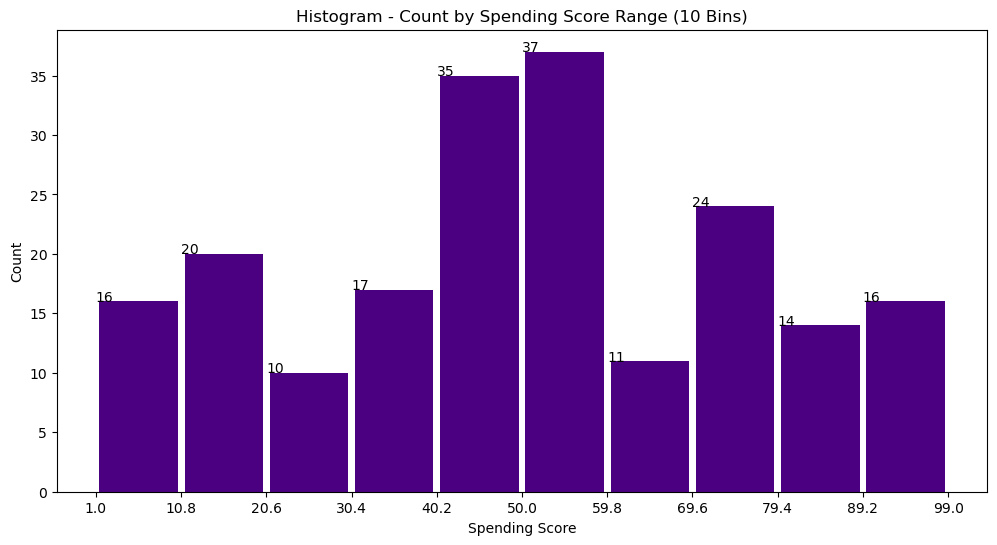

In [69]:
fig = plt.figure(figsize=(12, 6))

bins_10 = 10

spending_column = data['Spending Score']

bins_aux = np.linspace(spending_column.min(), spending_column.max(), bins_10 + 1)
hist = plt.hist(spending_column, bins = bins_aux, rwidth=0.92, color = 'indigo') 
plt.xticks(bins_aux)

plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.title('Histogram - Count by Spending Score Range (10 Bins)')
for i in range(bins_10):
    plt.text(hist[1][i],hist[0][i],int(hist[0][i]))

In [70]:
income_spending = data[['Annual Income', 'Spending Score']]

# Calculate correlation coefficient matrix
correlation_matrix = income_spending.corr()

# Print the correlation matrix
print(correlation_matrix)

                Annual Income  Spending Score
Annual Income        1.000000        0.009903
Spending Score       0.009903        1.000000


In [78]:
km_3 = KMeans(n_clusters=3)
y_pred_AI_KM3 = km_3.fit_predict(data[['Annual Income', 'Spending Score']])
y_pred_AI_KM3

c:\Users\manue\anaconda3\envs\dataScienceEnv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\manue\anaconda3\envs\dataScienceEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [86]:
data_pred = data
data_pred['cluster_AI_KM3'] = y_pred_AI_KM3
data_pred

,CustomerID,Gender,Age,Annual Income,Spending Score,cluster,cluster_KM3
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,2
196,197,Female,45,126,28,2,1
197,198,Male,32,126,74,1,2
198,199,Male,32,137,18,2,1


In [74]:
#check centroid
km_3.cluster_centers_

array([[44.15447154, 49.82926829],
       [86.53846154, 82.12820513],
       [87.        , 18.63157895]])

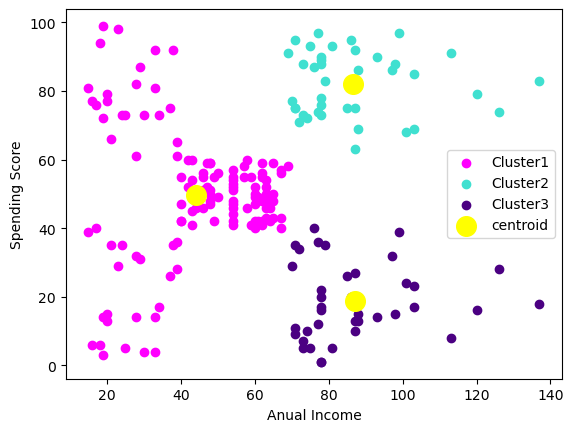

In [77]:
df0 = data_pred[data_pred.cluster_AI_KM3 == 0]
df1 = data_pred[data_pred.cluster_AI_KM3 == 1]
df2 = data_pred[data_pred.cluster_AI_KM3 == 2]
plt.scatter(df0['Annual Income'], df0['Spending Score'], color='magenta')
plt.scatter(df1['Annual Income'], df1['Spending Score'], color='turquoise')
plt.scatter(df2['Annual Income'], df2['Spending Score'], color='indigo')
plt.scatter(km_3.cluster_centers_[:,0], km_3.cluster_centers_[:,1], color='yellow', marker='o', label='centroid', s=200)
plt.xlabel('Anual Income')
plt.ylabel('Spending Score')
plt.legend(['Cluster1', 'Cluster2', 'Cluster3', 'centroid'])

In [ ]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Annual Income', 'Spending Score']])
    sse.append(km.inertia_)
sse

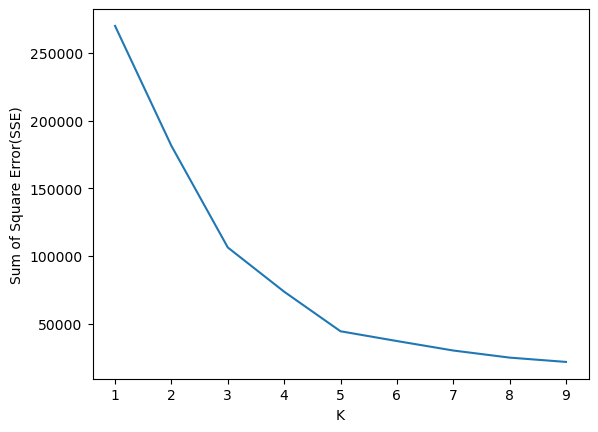

In [88]:
plt.xlabel('K')
plt.ylabel('Sum of Square Error(SSE)')
plt.plot(k_rng, sse)

In [89]:
km_5 = KMeans(n_clusters=5)
y_pred_KM5 = km_5.fit_predict(data[['Annual Income', 'Spending Score']])
y_pred_KM5

c:\Users\manue\anaconda3\envs\dataScienceEnv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\manue\anaconda3\envs\dataScienceEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [90]:
data_pred['cluster_AI_KM5'] = y_pred_KM5
data_pred

,CustomerID,Gender,Age,Annual Income,Spending Score,cluster,cluster_KM3,cluster_KM5
0,1,Male,19,15,39,0,0,3
1,2,Male,21,15,81,0,0,4
2,3,Female,20,16,6,0,0,3
3,4,Female,23,16,77,0,0,4
4,5,Female,31,17,40,0,0,3
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,2,1
196,197,Female,45,126,28,2,1,0
197,198,Male,32,126,74,1,2,1
198,199,Male,32,137,18,2,1,0


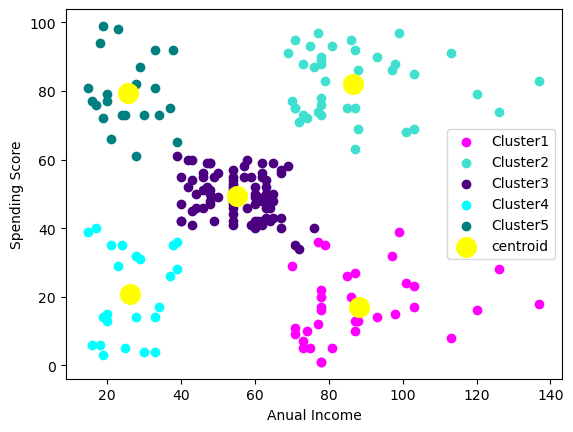

In [95]:
df0 = data_pred[data_pred.cluster_KM5 == 0]
df1 = data_pred[data_pred.cluster_KM5 == 1]
df2 = data_pred[data_pred.cluster_KM5 == 2]
df3 = data_pred[data_pred.cluster_KM5 == 3]
df4 = data_pred[data_pred.cluster_KM5 == 4]
plt.scatter(df0['Annual Income'], df0['Spending Score'], color='magenta')
plt.scatter(df1['Annual Income'], df1['Spending Score'], color='turquoise')
plt.scatter(df2['Annual Income'], df2['Spending Score'], color='indigo')
plt.scatter(df3['Annual Income'], df3['Spending Score'], color='cyan')
plt.scatter(df4['Annual Income'], df4['Spending Score'], color='teal')
plt.scatter(km_5.cluster_centers_[:,0], km_5.cluster_centers_[:,1], color='yellow', marker='o', label='centroid', s=200)
plt.xlabel('Anual Income')
plt.ylabel('Spending Score')
plt.legend(['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4', 'Cluster5','centroid'])

In [96]:
income_spending = data[['Age', 'Spending Score']]

# Calculate correlation coefficient matrix
correlation_matrix = income_spending.corr()

# Print the correlation matrix
print(correlation_matrix)

                     Age  Spending Score
Age             1.000000       -0.327227
Spending Score -0.327227        1.000000


In [97]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age', 'Spending Score']])
    sse.append(km.inertia_)
sse

c:\Users\manue\anaconda3\envs\dataScienceEnv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\manue\anaconda3\envs\dataScienceEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\manue\anaconda3\envs\dataScienceEnv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\manue\anaconda3\envs\dataScienceEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there a

[171535.5,
 75949.15601023017,
 45840.67661610868,
 28165.583566629342,
 23810.46223307136,
 19566.522341377608,
 15561.532611128316,
 12997.44928811929,
 11496.322958676628]

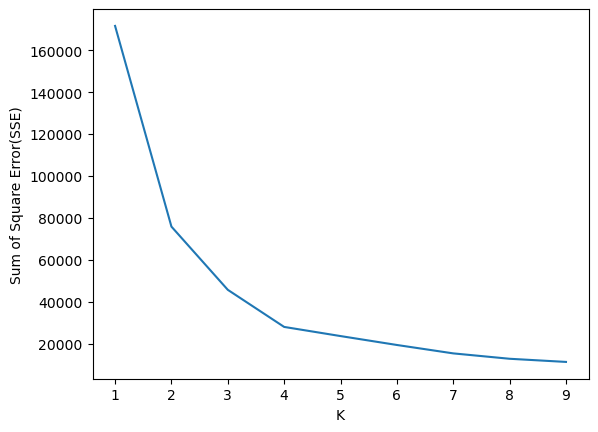

In [98]:
plt.xlabel('K')
plt.ylabel('Sum of Square Error(SSE)')
plt.plot(k_rng, sse)

In [99]:
km_4 = KMeans(n_clusters=4)
y_pred_KM4 = km_4.fit_predict(data[['Age', 'Spending Score']])
y_pred_KM4

c:\Users\manue\anaconda3\envs\dataScienceEnv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\manue\anaconda3\envs\dataScienceEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 1, 3, 0, 1, 0,
       3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 2, 1,
       3, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 2, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [101]:
data_pred['cluster_Age_KM4'] = y_pred_KM4
data_pred

,CustomerID,Gender,Age,Annual Income,Spending Score,cluster,cluster_KM3,cluster_KM5,cluster_Age_KM4
0,1,Male,19,15,39,0,0,3,1
1,2,Male,21,15,81,0,0,4,0
2,3,Female,20,16,6,0,0,3,3
3,4,Female,23,16,77,0,0,4,0
4,5,Female,31,17,40,0,0,3,1
...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,2,1,0
196,197,Female,45,126,28,2,1,0,3
197,198,Male,32,126,74,1,2,1,0
198,199,Male,32,137,18,2,1,0,3


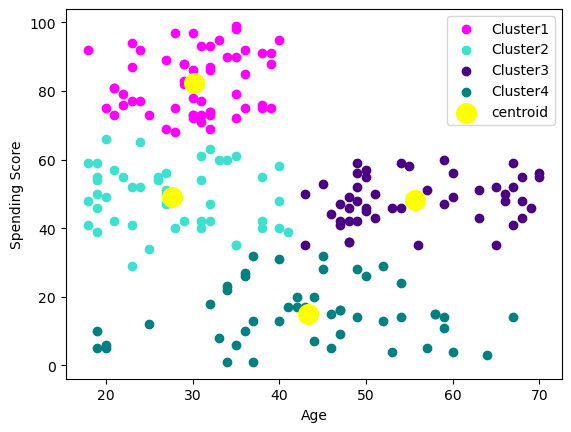

In [104]:
df0 = data_pred[data_pred.cluster_Age_KM4 == 0]
df1 = data_pred[data_pred.cluster_Age_KM4 == 1]
df2 = data_pred[data_pred.cluster_Age_KM4 == 2]
df3 = data_pred[data_pred.cluster_Age_KM4 == 3]
plt.scatter(df0['Age'], df0['Spending Score'], color='magenta')
plt.scatter(df1['Age'], df1['Spending Score'], color='turquoise')
plt.scatter(df2['Age'], df2['Spending Score'], color='indigo')
plt.scatter(df3['Age'], df3['Spending Score'], color='teal')
plt.scatter(km_4.cluster_centers_[:,0], km_4.cluster_centers_[:,1], color='yellow', marker='o', label='centroid', s=200)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend(['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4','centroid'])

c:\Users\manue\anaconda3\envs\dataScienceEnv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\manue\anaconda3\envs\dataScienceEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


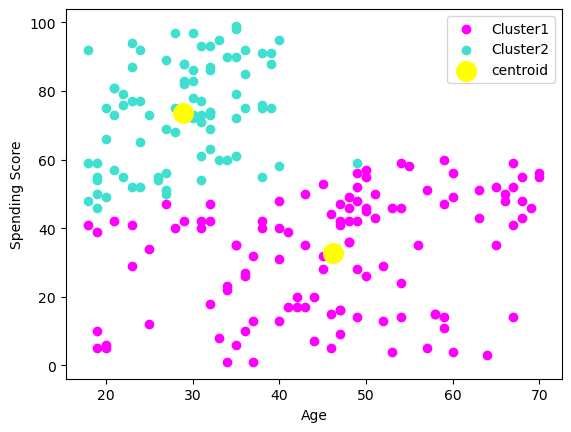

In [106]:
km_2 = KMeans(n_clusters=2)
y_pred_KM2 = km_2.fit_predict(data[['Age', 'Spending Score']])
data_pred['cluster_Age_KM2'] = y_pred_KM2
df0 = data_pred[data_pred.cluster_Age_KM2 == 0]
df1 = data_pred[data_pred.cluster_Age_KM2 == 1]
plt.scatter(df0['Age'], df0['Spending Score'], color='magenta')
plt.scatter(df1['Age'], df1['Spending Score'], color='turquoise')
plt.scatter(km_2.cluster_centers_[:,0], km_2.cluster_centers_[:,1], color='yellow', marker='o', label='centroid', s=200)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend(['Cluster1', 'Cluster2', 'centroid'])